# 희귀질환 분류에 따른 분석

## 기본 세팅

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/sha

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns

## 데이터셋 준비

In [4]:
df_rare_2021 = pd.read_csv('../csv/2021_질병분류코드별_진료내역_항목별_요양급여비용_현황.csv')
df_rare_2021

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
0,계,소계,NaN,317789679,63604106,48547544,6489961,69347268,1024116,13417865,129127,22622419,46850108,4686879,41070288
1,희귀질환,소계,NaN,308572698,62306518,46864613,6321592,67957685,982444,12554025,116157,21761403,45152854,4559229,39996179
2,희귀질환,A81.0,크로이츠펠트-야콥병,1624857,73975,273196,29930,124240,1114,107553,20,134960,156167,7086,716615
3,희귀질환,D12.6,M8220/0 가족성선종성폴립증,322142,25918,51745,3271,16059,10331,70,240,114390,52848,3312,43957
4,희귀질환,D55.0,G6PD결핍빈혈,177,49,-,-,-,-,-,-,-,128,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,기타염색체이상질환,Q93.5,16번 염색체 단완의 결손,326,271,55,-,-,-,-,-,-,-,-,-
722,기타염색체이상질환,Q93.2,18번 고리모양 염색체,492,211,93,-,-,-,-,30,-,157,-,-
723,기타염색체이상질환,Q92.7,18번 염색체 단완의 사염색체증,7104,903,159,7,-,-,1341,-,28,4466,181,18
724,기타염색체이상질환,Q99.8,X 염색체장완의 28부분의 중복 증후군,5423,547,17,-,-,-,4462,-,-,398,-,-


In [5]:
df_region = pd.read_csv('../csv/2021_지역별_질병분류코드별_발생자수.csv')  # 지역별
df_region

,질병코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,...,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음
0,계,NaN,43079,8601,2446,11377,1274,1752,1291,1080,...,2431,2243,2762,2120,789,1501,1392,1076,690,16
1,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,...,24,19,15,22,6,6,20,20,9,1
2,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,...,21,7,15,11,4,6,2,1,1,0
3,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,...,11,30,13,37,4,13,13,14,14,0
4,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,...,11,12,15,13,5,6,12,9,3,0
5,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,...,42,48,56,27,35,15,18,10,11,0
6,F01.1,카다실,276,43,6,43,2,7,1,4,...,8,12,17,15,16,6,2,0,90,0
7,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,...,41,33,27,26,10,14,20,19,7,0
8,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,...,6,7,9,12,4,8,6,11,1,0
9,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,...,53,52,68,43,16,44,24,17,14,0


In [6]:
df_age_gender = pd.read_csv('../csv/2021_질병분류코드별_발생자수.csv')  # 연령,성별
df_age_gender

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질병코드,질병명
0,계,계,43079,466,799,2272,4196,4344,5345,7072,8618,6602,3365,계,NaN
1,D61.3 특발성 무형성빈혈,계,406,1,14,30,46,36,51,65,74,65,24,D61.3,특발성 무형성빈혈
2,D61.3 특발성 무형성빈혈,남자,186,0,8,17,22,12,26,26,37,30,8,D61.3,특발성 무형성빈혈
3,D61.3 특발성 무형성빈혈,여자,220,1,6,13,24,24,25,39,37,35,16,D61.3,특발성 무형성빈혈
4,D61.9 저형성빈혈 NOS,계,223,0,13,18,18,29,27,31,42,26,19,D61.9,저형성빈혈 NOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"Q85.0 신경섬유종증(비악성) 1형, 2형",남자,146,13,57,21,17,15,7,11,4,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형"
153,"Q85.0 신경섬유종증(비악성) 1형, 2형",여자,174,20,55,14,28,21,10,17,8,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형"
154,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",계,426,0,0,2,6,15,40,107,150,84,22,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."
155,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",남자,302,0,0,1,4,6,31,69,106,67,18,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."


## 1. 전체 희귀질환 중 희귀질환 분류 비중 비교
### 4가지 분류
 - 희귀질환
 - 극희귀질환
 - 기타염색체이상질환
 - 상세불명희귀질환

In [7]:
df_rare_2021_value_counts = df_rare_2021['질환분류'].value_counts()
df_rare_2021_value_counts

질환분류
희귀질환         509
극희귀질환        182
기타염색체이상질환     34
계              1
Name: count, dtype: int64

In [8]:
# '질환분류' 모든 값의 총 개수
df_rare_2021_total_counts = len(df_rare_2021['질환분류'])
df_rare_2021_total_counts

726

In [9]:
# 각 질환분류별 분포도(%)
df_rare_2021_population_accural = ((df_rare_2021_value_counts / df_rare_2021_total_counts) * 100).round(2)
df_rare_2021_population_accural

질환분류
희귀질환         70.11
극희귀질환        25.07
기타염색체이상질환     4.68
계             0.14
Name: count, dtype: float64

In [45]:
df_rare_2021_value_counts

질환분류
희귀질환         509
극희귀질환        182
기타염색체이상질환     34
계              1
Name: count, dtype: int64

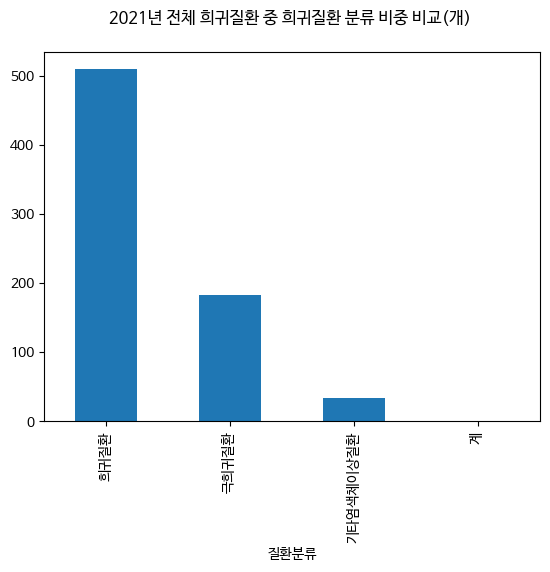

In [54]:
# 막대 그래프 그리기
df_rare_2021_value_counts.plot(x='질환분류', kind='bar')
plt.title('2021년 전체 희귀질환 중 희귀질환 분류 비중 비교(개) \n')
plt.show()

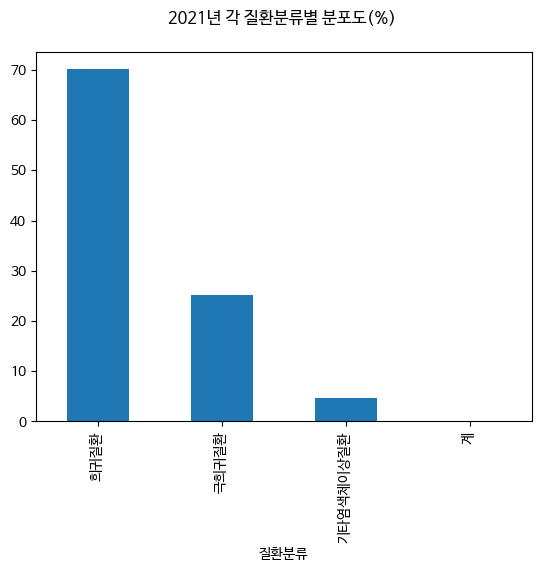

In [53]:
# 막대 그래프 그리기
df_rare_2021_population_accural.plot(x='질환분류', kind='bar')
plt.title('2021년 각 질환분류별 분포도(%) \n')
plt.show()

### 전체 희귀질환 중 희귀질환 분류 비중
 - 희귀질환 : 70.11%
 - 극희귀질환 : 25.07%
 - 기타염색체이상질환 : 4.68%
 - 상세불명희귀질환 : 0%

## 2. 희귀질환 분류별 발생자 비교(연령별/성별/지역별)

### 1) 연령별 비교

In [10]:
# '성별'이 '계', '남자', '여자'에 해당하는 행 필터링
df_age_gender_filter = df_age_gender[df_age_gender['성별'].isin(['계', '남자', '여자'])]
df_age_gender_filter

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질병코드,질병명
0,계,계,43079,466,799,2272,4196,4344,5345,7072,8618,6602,3365,계,NaN
1,D61.3 특발성 무형성빈혈,계,406,1,14,30,46,36,51,65,74,65,24,D61.3,특발성 무형성빈혈
2,D61.3 특발성 무형성빈혈,남자,186,0,8,17,22,12,26,26,37,30,8,D61.3,특발성 무형성빈혈
3,D61.3 특발성 무형성빈혈,여자,220,1,6,13,24,24,25,39,37,35,16,D61.3,특발성 무형성빈혈
4,D61.9 저형성빈혈 NOS,계,223,0,13,18,18,29,27,31,42,26,19,D61.9,저형성빈혈 NOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"Q85.0 신경섬유종증(비악성) 1형, 2형",남자,146,13,57,21,17,15,7,11,4,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형"
153,"Q85.0 신경섬유종증(비악성) 1형, 2형",여자,174,20,55,14,28,21,10,17,8,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형"
154,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",계,426,0,0,2,6,15,40,107,150,84,22,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."
155,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",남자,302,0,0,1,4,6,31,69,106,67,18,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."


In [11]:
# 항목분류 dataframe 생성
col1 = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', '코드없음']
col2 = ['특정감염성', '신생물', '혈액조혈기관', '내분비및영양', '정신및행동', '신경계통질환', '눈및부속기관', '순환기계통', '호흡기계통', '소화기계통', '피부및조직', '근육골격계통', '비뇨생식', '출생전후기', '선천기형변형', '코드없음']

df_alphabet = pd.DataFrame({
    '분류기호': col1,
    '분류명': col2
})

df_alphabet

,분류기호,분류명
0,A,특정감염성
1,C,신생물
2,D,혈액조혈기관
3,E,내분비및영양
4,F,정신및행동
5,G,신경계통질환
6,H,눈및부속기관
7,I,순환기계통
8,J,호흡기계통
9,K,소화기계통


In [12]:
df_age_gender_filter['질병코드 및 질환'].value_counts()

질병코드 및 질환
D61.3 특발성 무형성빈혈                                                                        3
D68.6 항인지질증후군                                                                          3
D61.9 저형성빈혈 NOS                                                                        3
D86.0 폐의 사르코이드증                                                                        3
E27.4 부신피질부전 NOS                                                                       3
G41.9 상세불명의 뇌전증지속상태                                                                    3
F01.1 카다실                                                                              3
G11.2 만기발병 소뇌성 운동실조(발병은 보통 20세 이후)                                                     3
G11.9 상세불명의 유전성 운동실조                                                                   3
G12.2 운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)                                       3
G23.1 진행성 핵상안근마비 [스틸-리차드슨-올스제위스키]                                                      3
G35 다발경화증  

In [13]:
# '질병코드 및 질환' 열에서 첫 번째 알파벳 추출
df_age_gender_filter['질환알파벳코드'] = df_age_gender_filter['질병코드 및 질환'].str[0]
df_age_gender_filter

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질병코드,질병명,질환알파벳코드
0,계,계,43079,466,799,2272,4196,4344,5345,7072,8618,6602,3365,계,NaN,계
1,D61.3 특발성 무형성빈혈,계,406,1,14,30,46,36,51,65,74,65,24,D61.3,특발성 무형성빈혈,D
2,D61.3 특발성 무형성빈혈,남자,186,0,8,17,22,12,26,26,37,30,8,D61.3,특발성 무형성빈혈,D
3,D61.3 특발성 무형성빈혈,여자,220,1,6,13,24,24,25,39,37,35,16,D61.3,특발성 무형성빈혈,D
4,D61.9 저형성빈혈 NOS,계,223,0,13,18,18,29,27,31,42,26,19,D61.9,저형성빈혈 NOS,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"Q85.0 신경섬유종증(비악성) 1형, 2형",남자,146,13,57,21,17,15,7,11,4,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형",Q
153,"Q85.0 신경섬유종증(비악성) 1형, 2형",여자,174,20,55,14,28,21,10,17,8,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형",Q
154,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",계,426,0,0,2,6,15,40,107,150,84,22,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...",질
155,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",남자,302,0,0,1,4,6,31,69,106,67,18,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...",질


In [14]:
# 질병명 컬럼에서 인덱스 156번 추출
disease_name_156 = df_age_gender_filter.loc[156, '질병명']
disease_name_156

'특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에 따라 KCD 부호를 달리 부여 면역글로블린 G4 관련 질환'

In [15]:
# df_age_gender_filter와 df_alphabet concat
df_age_gender_merge = pd.merge(df_age_gender_filter, df_alphabet, left_on='질환알파벳코드', right_on='분류기호', how='left')
df_age_gender_merge

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질병코드,질병명,질환알파벳코드,분류기호,분류명
0,계,계,43079,466,799,2272,4196,4344,5345,7072,8618,6602,3365,계,NaN,계,NaN,NaN
1,D61.3 특발성 무형성빈혈,계,406,1,14,30,46,36,51,65,74,65,24,D61.3,특발성 무형성빈혈,D,D,혈액조혈기관
2,D61.3 특발성 무형성빈혈,남자,186,0,8,17,22,12,26,26,37,30,8,D61.3,특발성 무형성빈혈,D,D,혈액조혈기관
3,D61.3 특발성 무형성빈혈,여자,220,1,6,13,24,24,25,39,37,35,16,D61.3,특발성 무형성빈혈,D,D,혈액조혈기관
4,D61.9 저형성빈혈 NOS,계,223,0,13,18,18,29,27,31,42,26,19,D61.9,저형성빈혈 NOS,D,D,혈액조혈기관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"Q85.0 신경섬유종증(비악성) 1형, 2형",남자,146,13,57,21,17,15,7,11,4,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형",Q,Q,선천기형변형
153,"Q85.0 신경섬유종증(비악성) 1형, 2형",여자,174,20,55,14,28,21,10,17,8,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형",Q,Q,선천기형변형
154,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",계,426,0,0,2,6,15,40,107,150,84,22,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...",질,NaN,NaN
155,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",남자,302,0,0,1,4,6,31,69,106,67,18,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...",질,NaN,NaN


#### 단순 '분류명' 분포 확인

In [16]:
df_age_gender_merge_value_conuts = df_age_gender_merge['분류명'].value_counts()
df_age_gender_merge_value_conuts

분류명
신경계통질환    39
근육골격계통    30
선천기형변형    21
순환기계통     18
소화기계통     15
혈액조혈기관    12
눈및부속기관     6
정신및행동      3
내분비및영양     3
호흡기계통      3
피부및조직      3
Name: count, dtype: int64

In [17]:
# '분류명' 모든 값의 총 개수
df_age_gender_merge_classf = len(df_age_gender_merge['분류명'])
df_age_gender_merge_classf

157

In [18]:
# 각 분류명별 분포도(%)
df_age_gender_distrb = ((df_age_gender_merge_value_conuts / df_age_gender_merge_classf) * 100).round(2)
df_age_gender_distrb

분류명
신경계통질환    24.84
근육골격계통    19.11
선천기형변형    13.38
순환기계통     11.46
소화기계통      9.55
혈액조혈기관     7.64
눈및부속기관     3.82
정신및행동      1.91
내분비및영양     1.91
호흡기계통      1.91
피부및조직      1.91
Name: count, dtype: float64

#### 분류명에 따른 연령대별(성별'계') 확인

In [19]:
# '분류명'과 '성별' column에서 '계'만 필터링
df_age_gender_merge_filterTotal = df_age_gender_merge[df_age_gender_merge['성별'] == '계']

# '분류명'을 기준으로 정렬하여 출력
result_filterTotal = df_age_gender_merge_filterTotal.groupby('분류명')['성별'].value_counts()
result_filterTotal

분류명     성별
근육골격계통  계     10
내분비및영양  계      1
눈및부속기관  계      2
선천기형변형  계      7
소화기계통   계      5
순환기계통   계      6
신경계통질환  계     13
정신및행동   계      1
피부및조직   계      1
혈액조혈기관  계      4
호흡기계통   계      1
Name: count, dtype: int64

In [20]:
# '질병코드' -> '질환코드' column명 변경
df_age_gender_merge.rename(columns={'질병코드': '질환코드'}, inplace=True)
df_age_gender_merge

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질환코드,질병명,질환알파벳코드,분류기호,분류명
0,계,계,43079,466,799,2272,4196,4344,5345,7072,8618,6602,3365,계,NaN,계,NaN,NaN
1,D61.3 특발성 무형성빈혈,계,406,1,14,30,46,36,51,65,74,65,24,D61.3,특발성 무형성빈혈,D,D,혈액조혈기관
2,D61.3 특발성 무형성빈혈,남자,186,0,8,17,22,12,26,26,37,30,8,D61.3,특발성 무형성빈혈,D,D,혈액조혈기관
3,D61.3 특발성 무형성빈혈,여자,220,1,6,13,24,24,25,39,37,35,16,D61.3,특발성 무형성빈혈,D,D,혈액조혈기관
4,D61.9 저형성빈혈 NOS,계,223,0,13,18,18,29,27,31,42,26,19,D61.9,저형성빈혈 NOS,D,D,혈액조혈기관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"Q85.0 신경섬유종증(비악성) 1형, 2형",남자,146,13,57,21,17,15,7,11,4,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형",Q,Q,선천기형변형
153,"Q85.0 신경섬유종증(비악성) 1형, 2형",여자,174,20,55,14,28,21,10,17,8,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형",Q,Q,선천기형변형
154,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",계,426,0,0,2,6,15,40,107,150,84,22,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...",질,NaN,NaN
155,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",남자,302,0,0,1,4,6,31,69,106,67,18,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...",질,NaN,NaN


In [21]:
# df_age_gender_merge(질병코드)에 df_rare_2021 '질환분류' 합치기 (질환코드, 질환명)

# 두 개의 데이터프레임을 '질환코드'를 기준으로 병합
df_merge_two_dataframe = pd.concat([df_age_gender_merge, df_rare_2021[['질환코드', '질환분류']]], 
                                 ignore_index=True, sort=False)

# 중복된 '질환코드'가 있는 경우, 'df_rare_2021' dataframe에서 '질환분류'를 가져와서 병합
df_merge_two_dataframe = df_merge_two_dataframe.drop_duplicates(subset='질환코드')

# 새로운 'df_age_gender_merge' dataframe을 다시 작성
df_merge_two_dataframe.reset_index(drop=True, inplace=True)
df_merge_two_dataframe

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질환코드,질병명,질환알파벳코드,분류기호,분류명,질환분류
0,계,계,43079.0,466.0,799.0,2272.0,4196.0,4344.0,5345.0,7072.0,8618.0,6602.0,3365.0,계,NaN,계,NaN,NaN,NaN
1,D61.3 특발성 무형성빈혈,계,406.0,1.0,14.0,30.0,46.0,36.0,51.0,65.0,74.0,65.0,24.0,D61.3,특발성 무형성빈혈,D,D,혈액조혈기관,NaN
2,D61.9 저형성빈혈 NOS,계,223.0,0.0,13.0,18.0,18.0,29.0,27.0,31.0,42.0,26.0,19.0,D61.9,저형성빈혈 NOS,D,D,혈액조혈기관,NaN
3,D68.6 항인지질증후군,계,469.0,0.0,0.0,9.0,31.0,98.0,99.0,95.0,66.0,45.0,26.0,D68.6,항인지질증후군,D,D,혈액조혈기관,NaN
4,D86.0 폐의 사르코이드증,계,319.0,0.0,0.0,0.0,25.0,50.0,52.0,78.0,75.0,32.0,7.0,D86.0,폐의 사르코이드증,D,D,혈액조혈기관,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q16.5,NaN,NaN,NaN,NaN,극희귀질환
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q92.1,NaN,NaN,NaN,NaN,기타염색체이상질환
391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q92.2,NaN,NaN,NaN,NaN,기타염색체이상질환
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q92.7,NaN,NaN,NaN,NaN,기타염색체이상질환


In [22]:
# 필요한 열만 추출
df_age_gender_filter_result = df_age_gender_filter[['질병코드 및 질환', '성별', '발생자수']]
df_age_gender_filter_result

,질병코드 및 질환,성별,발생자수
0,계,계,43079
1,D61.3 특발성 무형성빈혈,계,406
2,D61.3 특발성 무형성빈혈,남자,186
3,D61.3 특발성 무형성빈혈,여자,220
4,D61.9 저형성빈혈 NOS,계,223
...,...,...,...
152,"Q85.0 신경섬유종증(비악성) 1형, 2형",남자,146
153,"Q85.0 신경섬유종증(비악성) 1형, 2형",여자,174
154,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",계,426
155,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",남자,302


### 2021_질병분류코드별_진료내역_항목별_요양급여비용_현황_등록_후_12개월 파일 로드

In [23]:
# 질병분류 추출하기 위한 파일 read
df_medical_expense = pd.read_csv('../../csv/2021_질병분류코드별_진료내역_항목별_요양급여비용_현황_등록_후_12개월__20240424095654.csv')
df_medical_expense

,질병분류코드 및 질환별(1),질병분류코드 및 질환별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11
0,질병분류코드 및 질환별(1),질병분류코드 및 질환별(2),계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
1,계,소계,317789679,63604106,48547544,6489961,69347268,1024116,13417865,129127,22622419,46850108,4686879,41070288
2,희귀질환,소계,308572698,62306518,46864613,6321592,67957685,982444,12554025,116157,21761403,45152854,4559229,39996179
3,희귀질환,A81.0 크로이츠펠트-야콥병,1624857,73975,273196,29930,124240,1114,107553,20,134960,156167,7086,716615
4,희귀질환,D12.6 M8220/0 가족성선종성폴립증,322142,25918,51745,3271,16059,10331,70,240,114390,52848,3312,43957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,기타염색체이상질환,Q93.5 16번 염색체 단완의 결손,326,271,55,-,-,-,-,-,-,-,-,-
723,기타염색체이상질환,Q93.2 18번 고리모양 염색체,492,211,93,-,-,-,-,30,-,157,-,-
724,기타염색체이상질환,Q92.7 18번 염색체 단완의 사염색체증,7104,903,159,7,-,-,1341,-,28,4466,181,18
725,기타염색체이상질환,Q99.8 X 염색체장완의 28부분의 중복 증후군,5423,547,17,-,-,-,4462,-,-,398,-,-


In [24]:
df_medical_expense['질병분류코드 및 질환별(2)'].value_counts()

질병분류코드 및 질환별(2)
소계                                        4
Q87.1 프라더-윌리 증후군                          1
Q87.2 루빈스타인-테이비 증후군                       1
Q87.2 바테르 증후군                             1
Q87.2 손발톱무릎뼈 증후군                          1
                                         ..
G71.1 근긴장장애                               1
G71.1 선천성 근긴장증 NOS                        1
G71.1 선천성 이상근긴장증                          1
G71.1 신경근육긴장[아이작스]                        1
G71.0 뒤쉔 또는 베커와 유사한 보통염색체열성 소아형 근디스트로피    1
Name: count, Length: 724, dtype: int64

In [25]:
# 데이터프레임 생성
df_medical_expense_extract = pd.DataFrame(df_medical_expense)

# 문자열 분리
df_medical_expense_extract['질환코드'] = df_medical_expense_extract['질병분류코드 및 질환별(2)'].str.extract(r'(\b\w+\.\d+)')  # 코드 추출
df_medical_expense_extract['질병명'] = df_medical_expense_extract['질병분류코드 및 질환별(2)'].str.replace(r'(\b\w+\.\d+)\s', '')  # 코드를 제외한 나머지를 질병명으로
df_medical_expense_extract['질병분류코드 및 질환별(1)'] = df_medical_expense['질병분류코드 및 질환별(1)']  # '질병분류코드 및 질환별(1)' column 추가

# 결과 출력
df_medical_expense_extract[['질병분류코드 및 질환별(1)','질환코드', '질병명']]

,질병분류코드 및 질환별(1),질환코드,질병명
0,질병분류코드 및 질환별(1),NaN,질병분류코드 및 질환별(2)
1,계,NaN,소계
2,희귀질환,NaN,소계
3,희귀질환,A81.0,A81.0 크로이츠펠트-야콥병
4,희귀질환,D12.6,D12.6 M8220/0 가족성선종성폴립증
...,...,...,...
722,기타염색체이상질환,Q93.5,Q93.5 16번 염색체 단완의 결손
723,기타염색체이상질환,Q93.2,Q93.2 18번 고리모양 염색체
724,기타염색체이상질환,Q92.7,Q92.7 18번 염색체 단완의 사염색체증
725,기타염색체이상질환,Q99.8,Q99.8 X 염색체장완의 28부분의 중복 증후군


In [26]:
# df_merge_two_dataframe과 df_medical_expense_extract을 질환코드를 기준으로 merge
merged_df = pd.merge(df_merge_two_dataframe, df_medical_expense_extract[['질환코드', '질병분류코드 및 질환별(1)']], on='질환코드', how='left')
merged_df

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질환코드,질병명,질환알파벳코드,분류기호,분류명,질환분류,질병분류코드 및 질환별(1)
0,계,계,43079.0,466.0,799.0,2272.0,4196.0,4344.0,5345.0,7072.0,8618.0,6602.0,3365.0,계,NaN,계,NaN,NaN,NaN,NaN
1,D61.3 특발성 무형성빈혈,계,406.0,1.0,14.0,30.0,46.0,36.0,51.0,65.0,74.0,65.0,24.0,D61.3,특발성 무형성빈혈,D,D,혈액조혈기관,NaN,희귀질환
2,D61.9 저형성빈혈 NOS,계,223.0,0.0,13.0,18.0,18.0,29.0,27.0,31.0,42.0,26.0,19.0,D61.9,저형성빈혈 NOS,D,D,혈액조혈기관,NaN,희귀질환
3,D61.9 저형성빈혈 NOS,계,223.0,0.0,13.0,18.0,18.0,29.0,27.0,31.0,42.0,26.0,19.0,D61.9,저형성빈혈 NOS,D,D,혈액조혈기관,NaN,희귀질환
4,D61.9 저형성빈혈 NOS,계,223.0,0.0,13.0,18.0,18.0,29.0,27.0,31.0,42.0,26.0,19.0,D61.9,저형성빈혈 NOS,D,D,혈액조혈기관,NaN,희귀질환
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q16.5,NaN,NaN,NaN,NaN,극희귀질환,극희귀질환
731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q92.1,NaN,NaN,NaN,NaN,기타염색체이상질환,기타염색체이상질환
732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q92.2,NaN,NaN,NaN,NaN,기타염색체이상질환,기타염색체이상질환
733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q92.7,NaN,NaN,NaN,NaN,기타염색체이상질환,기타염색체이상질환


In [27]:
merged_df['성별'].value_counts()

성별
계    85
Name: count, dtype: int64

In [28]:
# CSV 파일로 저장
merged_df.to_csv('merged_data.csv', index=False, encoding='utf-8')

In [29]:
# df_age_gender_merge와 df_medical_expense_extract concat
df_age_gender_merge = pd.merge(df_age_gender_merge, df_medical_expense_extract, left_on='질환알파벳코드', right_on='질병코드', how='left')
df_age_gender_merge

KeyError: '질병코드'

### 성별(추후 재확인)

In [30]:
# '성별'이 '계', '남자', '여자'에 해당하는 행 필터링
df_age_gender_filter_gen = df_age_gender_filter_result[df_age_gender_filter_result['성별'].isin(['계', '남자', '여자'])]

# 필요한 열만 추출
df_age_gender_filter_gen = df_age_gender_filter_gen[['질병코드 및 질환', '성별', '발생자수']]

# '계', '남자', '여자'로 구분하여 데이터프레임 생성
df_age_gender_filter_gen_sum = df_age_gender_filter_gen[df_age_gender_filter_gen['성별'] == '계']
df_age_gender_filter_gen_m = df_age_gender_filter_gen[df_age_gender_filter_gen['성별'] == '남자']
df_age_gender_filter_gen_w = df_age_gender_filter_gen[df_age_gender_filter_gen['성별'] == '여자']

In [31]:
# 계(남자+여자)
df_age_gender_filter_gen_sum

,질병코드 및 질환,성별,발생자수
0,계,계,43079
1,D61.3 특발성 무형성빈혈,계,406
4,D61.9 저형성빈혈 NOS,계,223
7,D68.6 항인지질증후군,계,469
10,D86.0 폐의 사르코이드증,계,319
13,E27.4 부신피질부전 NOS,계,618
16,F01.1 카다실,계,276
19,G11.2 만기발병 소뇌성 운동실조(발병은 보통 20세 이후),계,440
22,G11.9 상세불명의 유전성 운동실조,계,269
25,"G12.2 운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",계,889


In [32]:
# 남자
df_age_gender_filter_gen_m

,질병코드 및 질환,성별,발생자수
2,D61.3 특발성 무형성빈혈,남자,186
5,D61.9 저형성빈혈 NOS,남자,112
8,D68.6 항인지질증후군,남자,224
11,D86.0 폐의 사르코이드증,남자,159
14,E27.4 부신피질부전 NOS,남자,214
17,F01.1 카다실,남자,125
20,G11.2 만기발병 소뇌성 운동실조(발병은 보통 20세 이후),남자,236
23,G11.9 상세불명의 유전성 운동실조,남자,137
26,"G12.2 운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",남자,533
29,G23.1 진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],남자,150


In [33]:
# 여자
df_age_gender_filter_gen_w

,질병코드 및 질환,성별,발생자수
3,D61.3 특발성 무형성빈혈,여자,220
6,D61.9 저형성빈혈 NOS,여자,111
9,D68.6 항인지질증후군,여자,245
12,D86.0 폐의 사르코이드증,여자,160
15,E27.4 부신피질부전 NOS,여자,404
18,F01.1 카다실,여자,151
21,G11.2 만기발병 소뇌성 운동실조(발병은 보통 20세 이후),여자,204
24,G11.9 상세불명의 유전성 운동실조,여자,132
27,"G12.2 운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",여자,356
30,G23.1 진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],여자,92


## 3. 희귀질환 분류별 요양급여 비교

In [34]:
df_rare_2021_filter = df_rare_2021[(df_rare_2021['질환코드'] == '소계')]
df_rare_2021_filter[['질환분류', '질환코드', '계']]

,질환분류,질환코드,계
0,계,소계,317789679
1,희귀질환,소계,308572698
510,극희귀질환,소계,9049646
692,기타염색체이상질환,소계,167335


### 질환분류별 요양급여
  + 희귀질환 : 308,572,698원
  + 극희귀질환 : 9,049,646원
  + 기타염색체이상질환 : 167,335원

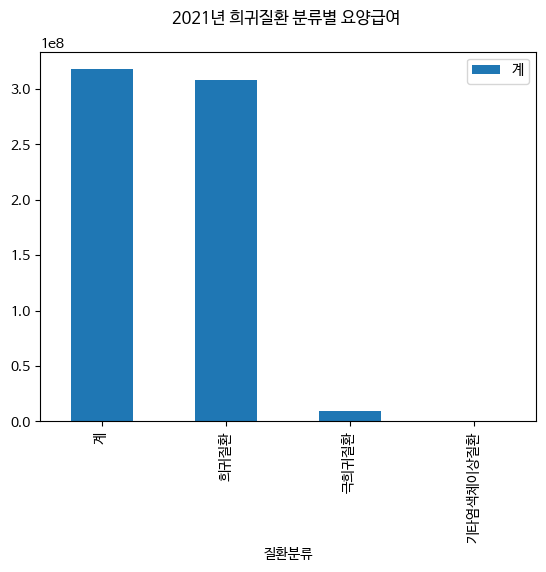

In [42]:
# 막대 그래프 그리기
df_rare_2021_filter.plot(x='질환분류', y='계', kind='bar')
plt.title('2021년 희귀질환 분류별 요양급여 \n')
plt.show()